# **Enterprise Endgame Evaluator**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc


In [2]:
df= pd.read_csv('data.csv')
print("Information about the Dataset:\n")
df.info()


Information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null  

**We observe that all 96 columns are either int or float value.**

In [3]:
df.dropna()
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
count = 0
not_scaled = []
for col in df.columns:
    if max(df[col])>1:
        print("not scaled : ", col)
        count += 1
        not_scaled.append(col)

print('Number columns not scaled:',len(not_scaled))


not scaled :   Operating Expense Rate
not scaled :   Research and development expense rate
not scaled :   Interest-bearing debt interest rate
not scaled :   Revenue Per Share (Yuan ¥)
not scaled :   Total Asset Growth Rate
not scaled :   Net Value Growth Rate
not scaled :   Current Ratio
not scaled :   Quick Ratio
not scaled :   Total debt/Total net worth
not scaled :   Accounts Receivable Turnover
not scaled :   Average Collection Days
not scaled :   Inventory Turnover Rate (times)
not scaled :   Fixed Assets Turnover Frequency
not scaled :   Revenue per person
not scaled :   Allocation rate per person
not scaled :   Quick Assets/Current Liability
not scaled :   Cash/Current Liability
not scaled :   Inventory/Current Liability
not scaled :   Long-term Liability to Current Assets
not scaled :   Current Asset Turnover Rate
not scaled :   Quick Asset Turnover Rate
not scaled :   Cash Turnover Rate
not scaled :   Fixed Assets to Assets
not scaled :   Total assets to GNP price
Number colum

# **Scaling**

In [5]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df[not_scaled] = scaler.fit_transform(df[not_scaled])

scaler = StandardScaler()
df[not_scaled] = scaler.fit_transform(df[not_scaled])

**Corelation between varibles**

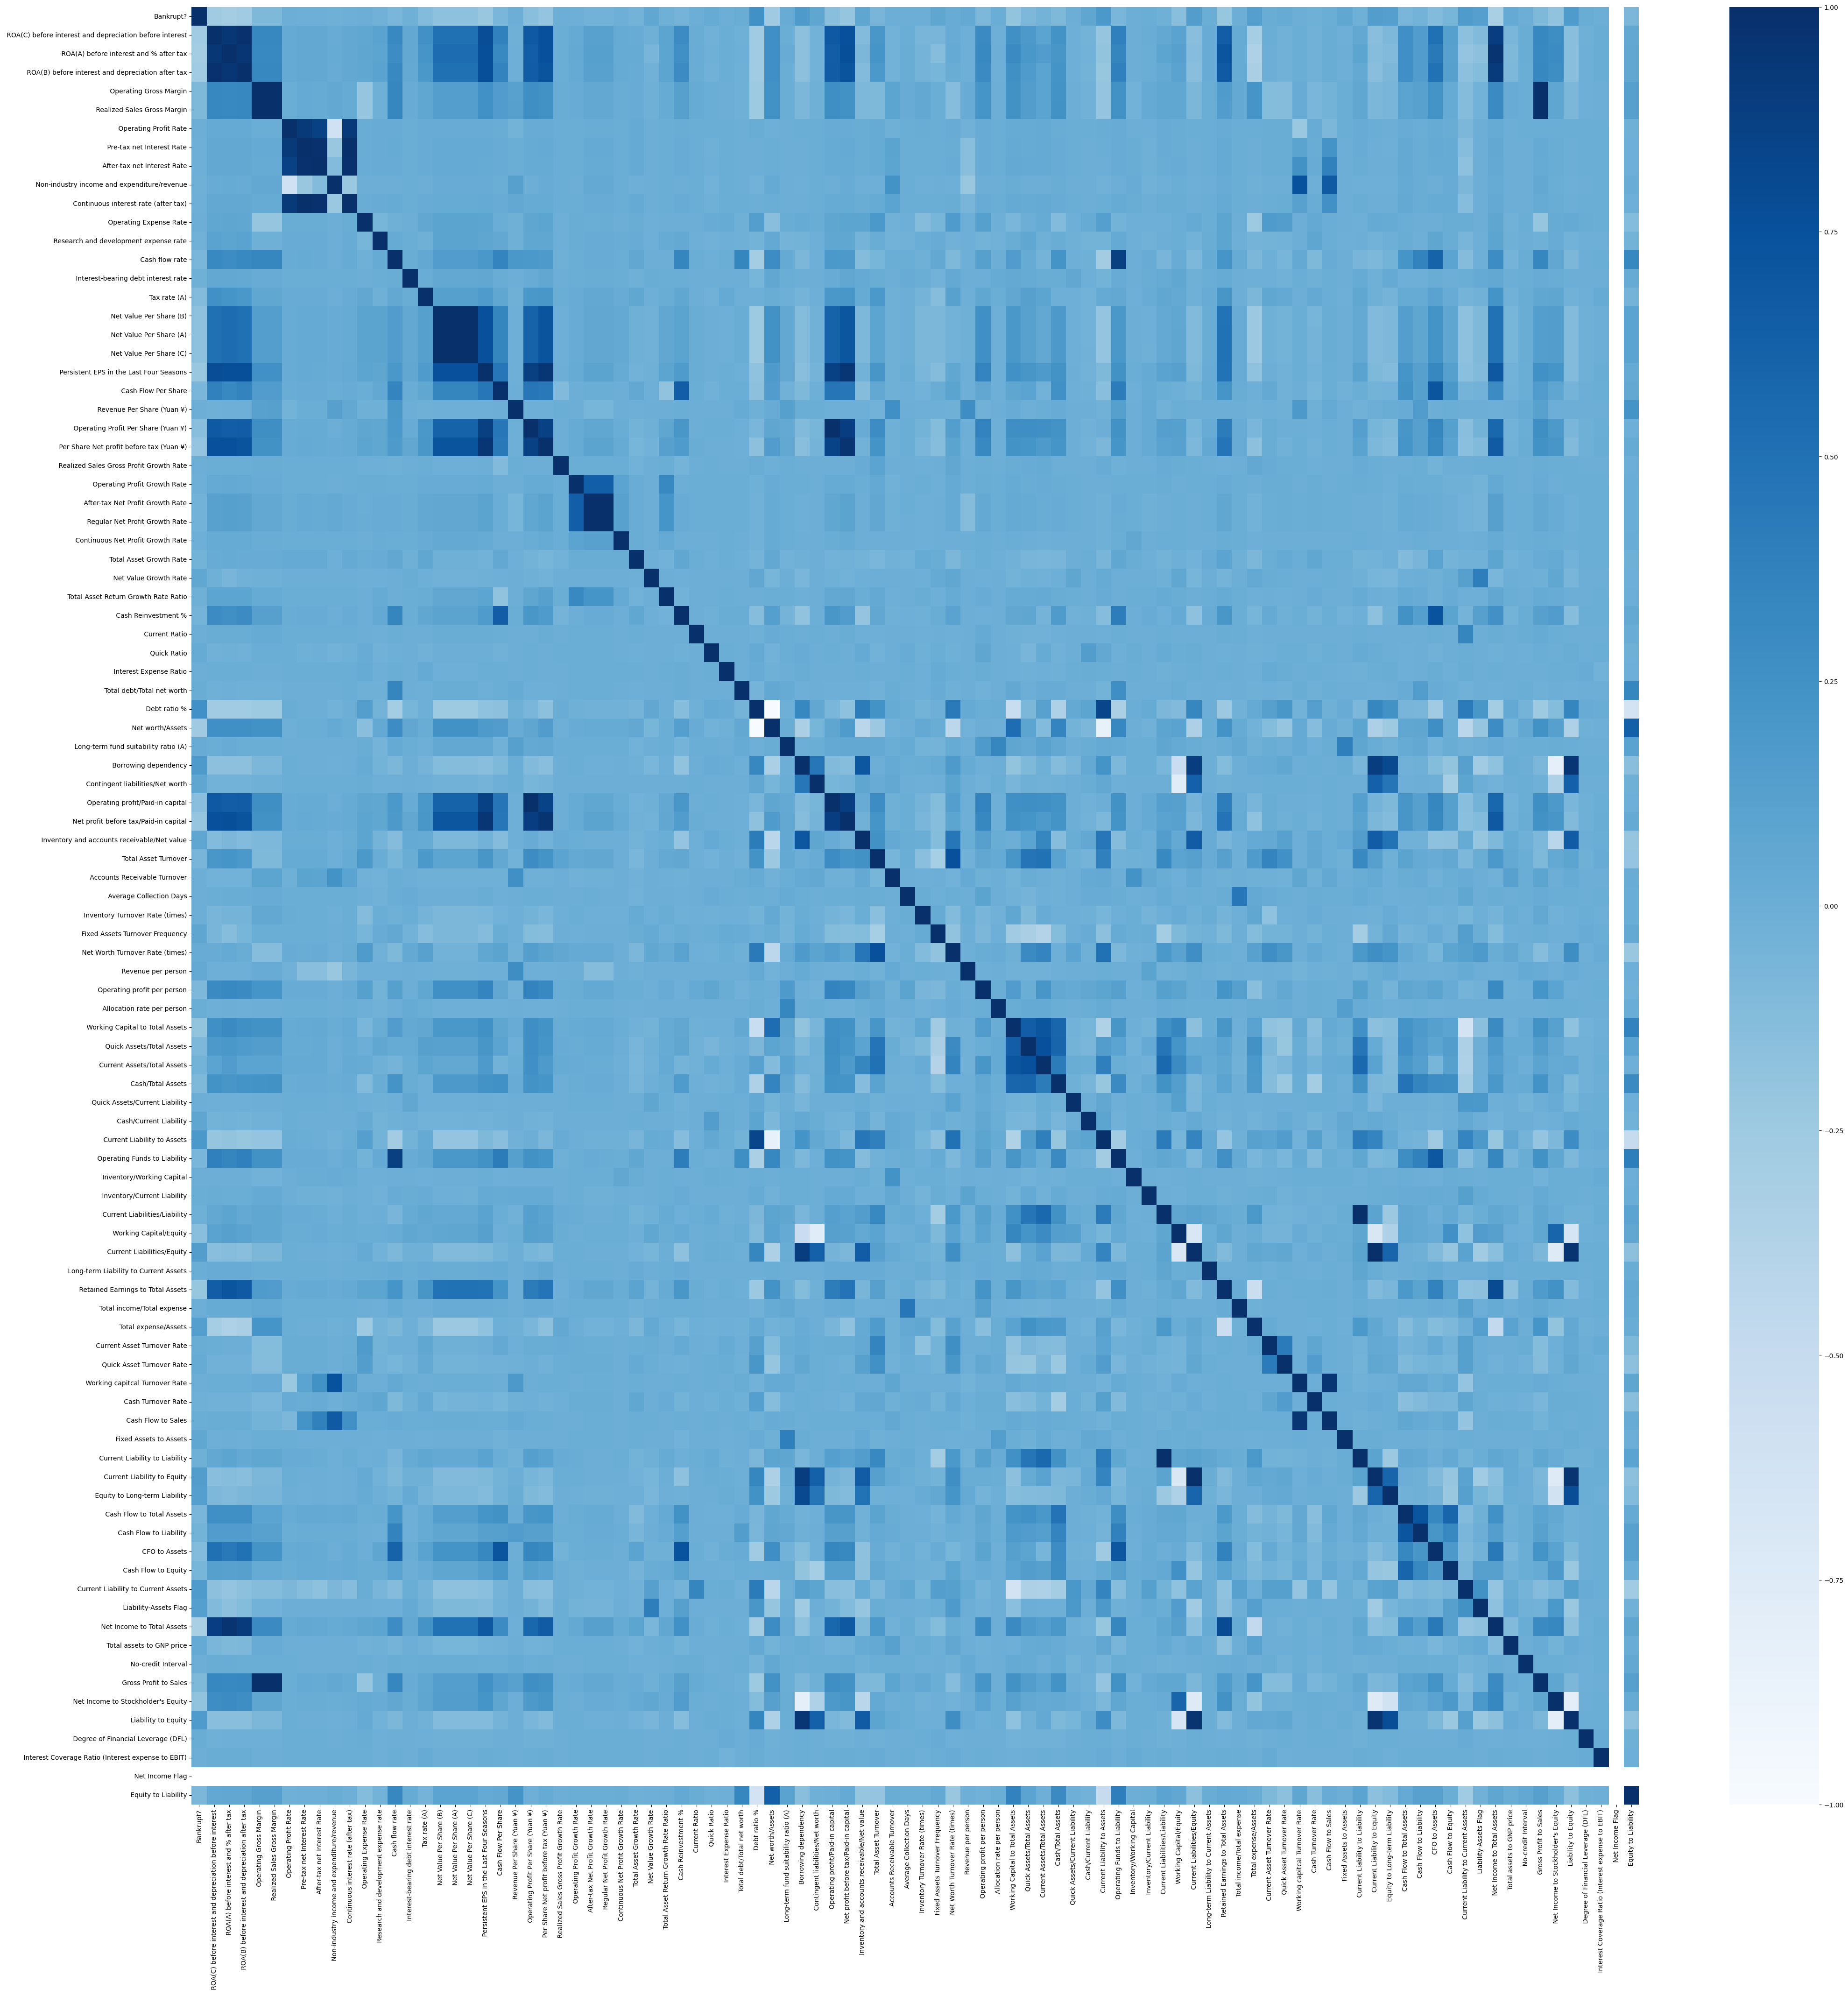

In [6]:
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(), cmap = "Blues")
plt.show()

In [7]:
corr_mtx = abs(df.corr())
corr_mtx.style.background_gradient(cmap='coolwarm')

c:\Users\TheRealJoker\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\TheRealJoker\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


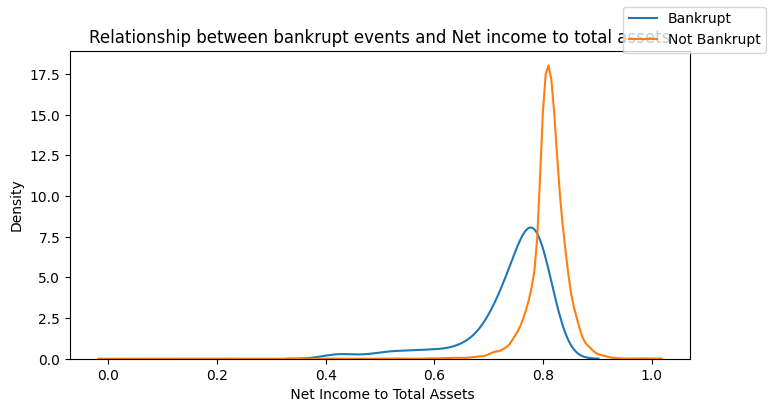

In [8]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt?']==1][' Net Income to Total Assets'])
sns.kdeplot(df[df['Bankrupt?']==0][' Net Income to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Net income to total assets')
plt.show()

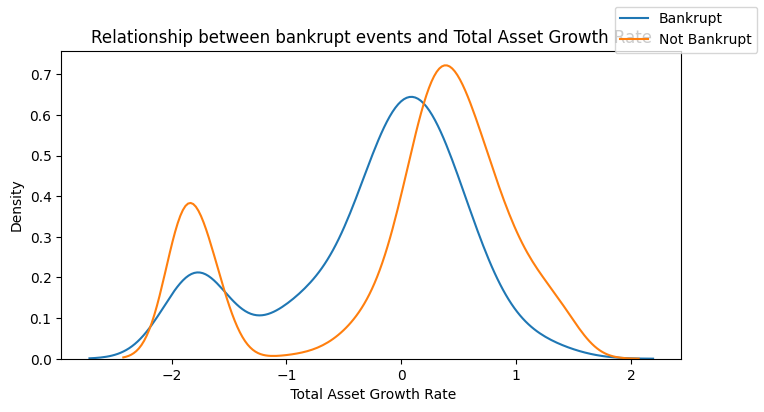

In [9]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt?']==1][' Total Asset Growth Rate'])
sns.kdeplot(df[df['Bankrupt?']==0][' Total Asset Growth Rate'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Total Asset Growth Rate')
plt.show()

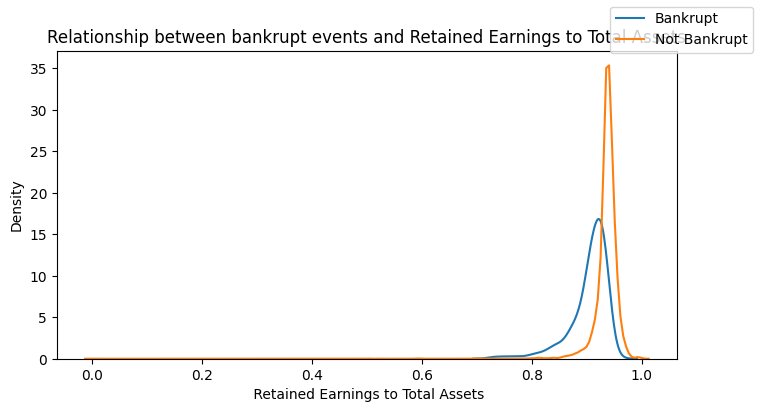

In [10]:
fig = plt.figure(figsize=(8,4))
sns.kdeplot(df[df['Bankrupt?']==1][' Retained Earnings to Total Assets'])
sns.kdeplot(df[df['Bankrupt?']==0][' Retained Earnings to Total Assets'])
fig.legend(labels=['Bankrupt', 'Not Bankrupt'])
plt.title('Relationship between bankrupt events and Retained Earnings to Total Assets')
plt.show()

In [11]:
df.shape


(6819, 96)

**There are 96 features including Target variable. we obviously need to decompose the features for better prediction**

Text(0.5, 1.0, 'Target feature - Bankrupt?')

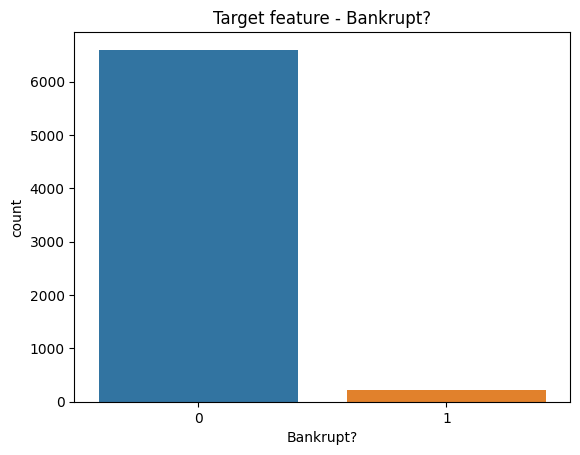

In [12]:
df['Bankrupt?'].value_counts()
sns.countplot(x=df['Bankrupt?'])
plt.title('Target feature - Bankrupt?')



**There is imbalance in the Target value, we need to oversample it based,
there is a huge difference between bankrupt and non-bankrupt companies.
As we can see that 96.8% of companies are non-bankrupt and 3.2% are bankrupt.
Now we must balance the data in order to build an ideal model capable of learning between the two types of companies**



SMOTE Technique
SMOTE actually creates as many synthetic examples for minority class as are requirred so that finally two target class are well represented. It does so by synthesising samples that are close to the feature space ,for the minority target class.

Shape of X before SMOTE:(6819, 95)
Shape of X after SMOTE:(13198, 95) 


Target Class distributuion before SMOTE:
0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: Bankrupt?, dtype: float64


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

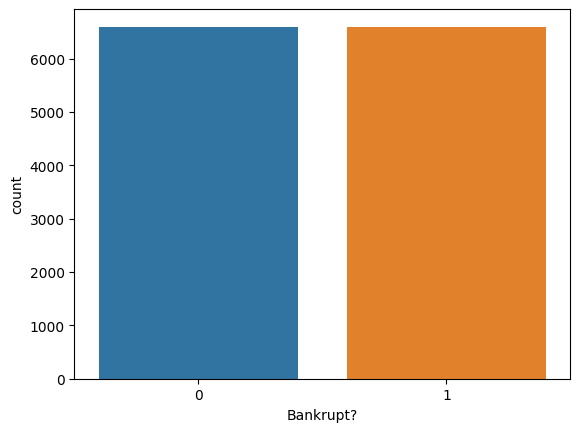

In [13]:
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']
oversample = SMOTE(random_state=50)
X_sm , y_sm = oversample.fit_resample(X,y)
print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')
sns.countplot(x=y_sm)


# **Feature Selection**

[4.06148600e-02 3.78900162e-02 2.93266526e-02 6.55443722e-03
 5.83642357e-03 5.75098190e-03 6.30308768e-03 7.54828027e-03
 7.04658453e-03 8.02791351e-03 5.75955282e-03 7.60411930e-03
 7.30289871e-03 1.39719920e-03 1.85819909e-02 1.57680330e-02
 1.16232451e-02 1.40563909e-02 3.36042354e-02 5.98214686e-03
 1.59266408e-05 1.43993374e-02 2.42022898e-02 4.45706457e-03
 3.71907687e-03 3.67296793e-03 3.70810989e-03 3.96229257e-03
 1.92080157e-02 4.69124342e-05 4.89585712e-03 6.13628416e-03
 0.00000000e+00 7.29483488e-05 6.61858173e-03 6.70334153e-04
 5.67637571e-02 6.20513698e-02 4.04362025e-03 2.39168926e-02
 4.93879094e-03 9.74500693e-03 2.84247134e-02 9.47887213e-03
 1.12111007e-02 4.53564089e-04 7.32952610e-05 8.41452867e-03
 1.23299043e-02 5.96465010e-03 2.02216654e-05 8.46235277e-03
 1.05568637e-04 1.93040500e-02 1.11874866e-02 6.61149942e-03
 1.76686661e-02 1.63485886e-05 2.50749583e-03 2.56493237e-02
 7.32438224e-03 6.07659687e-03 1.40920445e-03 9.16877261e-03
 5.49488219e-03 1.109368

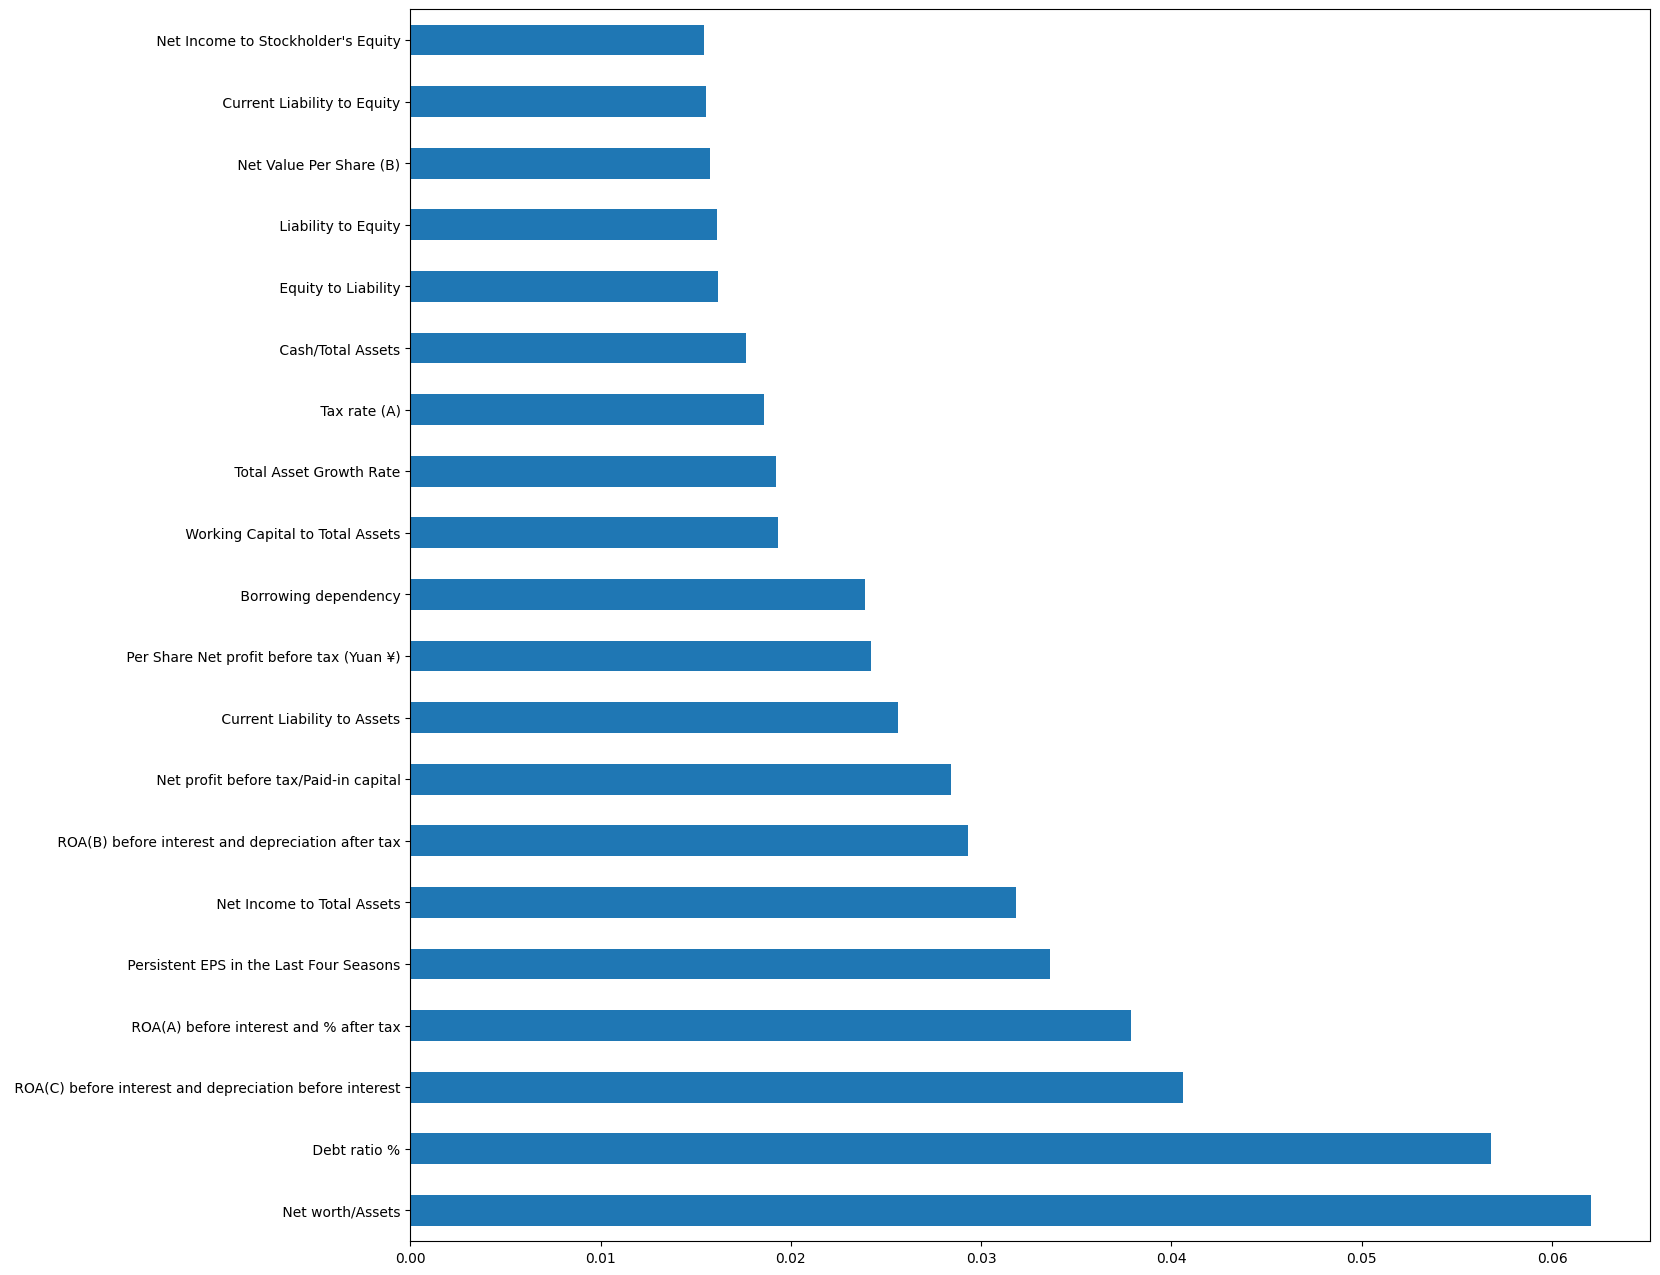

In [14]:
# data = pd.read_csv("data.csv")
# X=df.drop(labels=['Bankrupt?'], axis=1)
# y=df['Bankrupt?']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
plt.figure(figsize=(16, 16))

model.fit(X_sm,y_sm)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.show()

[0.01450039 0.00455847 0.00748239 0.00433384 0.0039333  0.00254056
 0.01577406 0.00735146 0.00994861 0.3335496  0.00483085 0.00757056
 0.00673815 0.00465888 0.01097846 0.00215047 0.00216326 0.00101299
 0.00359756 0.00456049 0.01662734 0.00496989 0.00375999 0.00307547
 0.00310081 0.00399529 0.00576804 0.00358526 0.00704597 0.
 0.00418595 0.00343711 0.         0.         0.01795744 0.01059215
 0.03134433 0.         0.0025466  0.08254696 0.012462   0.00460329
 0.0095312  0.00253337 0.00397356 0.01391156 0.         0.00467413
 0.00426262 0.00376685 0.01209504 0.00801383 0.         0.00300714
 0.00664802 0.00238456 0.00305072 0.         0.00173039 0.00352957
 0.00563919 0.00741869 0.01243079 0.00671871 0.00595981 0.00656219
 0.         0.01930018 0.00560263 0.00356107 0.00289394 0.00545542
 0.00618644 0.01105926 0.00943864 0.00287873 0.         0.
 0.00663324 0.00226518 0.0097068  0.00826911 0.00125166 0.00541501
 0.         0.0586565  0.         0.00490159 0.00138031 0.00686376
 0.01304705

<Figure size 3200x3200 with 0 Axes>

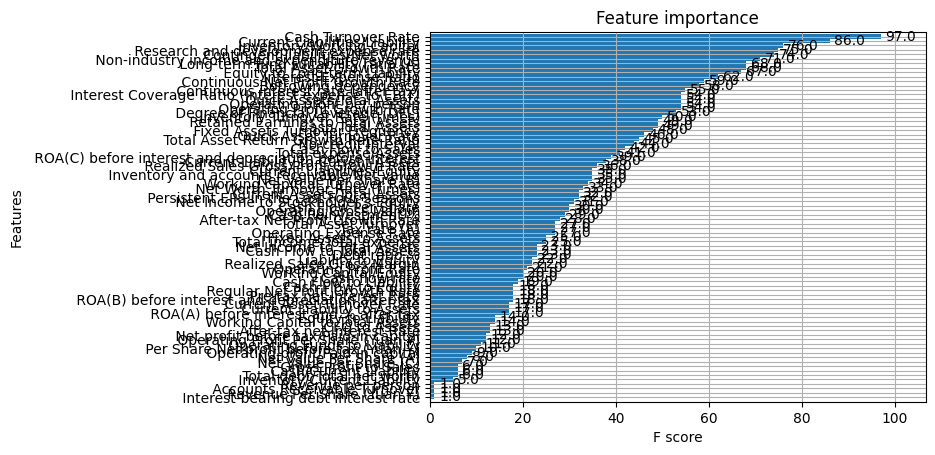

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

<Figure size 3200x3200 with 0 Axes>

In [15]:
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model.fit(X_sm, y_sm)
# feature importance
print(model.feature_importances_)
# plot
plt.figure(figsize=(32, 32))

plot_importance(model, height=1, )
plt.figure(figsize=(32, 32))

plt.show()
plt.figure(figsize=(32, 32))


In [16]:

# #get correlations of each features in dataset
# corrmat = X_sm.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(X_sm[top_corr_features].corr(),annot=True,cmap="RdYlGn")
X_sm

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,-0.049491,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,-0.049491,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,-0.049491,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,-0.049491,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,-0.049491,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,0.433680,0.453482,0.480425,0.599205,0.599205,0.998909,0.797131,0.809064,0.303197,0.781365,...,0.746550,-0.049491,0.623382,0.599201,0.832187,0.289924,0.026643,0.564298,1,0.020335
13194,0.437324,0.480420,0.487052,0.593570,0.593570,0.998746,0.797032,0.808965,0.303368,0.781210,...,0.762466,-0.049491,0.623089,0.593569,0.837072,0.280946,0.026684,0.564573,1,0.025767
13195,0.401512,0.390915,0.449145,0.594094,0.594115,0.998915,0.797156,0.809099,0.303231,0.781447,...,0.672623,-0.049491,0.623292,0.594091,0.780423,0.310029,0.027172,0.566164,1,0.019182
13196,0.475410,0.518758,0.516987,0.604672,0.604609,0.998984,0.797266,0.809173,0.303277,0.781421,...,0.780936,-0.049491,0.623019,0.604669,0.838532,0.283135,0.022213,0.569263,1,0.021718


In [17]:
# X_sm , y_sm = oversample.fit_resample(X,y)

sel_ = SelectKBest(mutual_info_classif, k=20).fit(X_sm, y_sm)
feature_names =X_sm.columns[sel_.get_support()]
X_selected = X_sm[feature_names]

X_selected 

# selected_features=X_sm.columns[sel_.get_support()]

# # X_sm = sel_.transform(X_sm)
# selected_features


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Total Asset Growth Rate,Borrowing dependency,Net profit before tax/Paid-in capital,Total Asset Turnover,Net Worth Turnover Rate (times),Retained Earnings to Total Assets,Net Income to Total Assets,Net Income to Stockholder's Equity
0,0.370594,0.424389,0.405750,0.302646,0.780985,0.147950,0.147950,0.147950,0.169141,0.311664,0.095921,0.138736,-0.182259,0.390284,0.137757,0.086957,0.032903,0.903225,0.716845,0.827890
1,0.464291,0.538214,0.516730,0.303556,0.781506,0.182251,0.182251,0.182251,0.208944,0.318137,0.093722,0.169918,0.207732,0.376760,0.168962,0.064468,0.025484,0.931065,0.795297,0.839969
2,0.426071,0.499019,0.472295,0.302035,0.780284,0.177911,0.177911,0.193713,0.180581,0.307102,0.092338,0.142803,0.611527,0.379093,0.148036,0.014993,0.013387,0.909903,0.774670,0.836774
3,0.399844,0.451265,0.457733,0.303350,0.781241,0.154187,0.154187,0.154187,0.193722,0.321674,0.077762,0.148603,-0.216772,0.379743,0.147561,0.089955,0.028065,0.906902,0.739555,0.834697
4,0.465022,0.538432,0.522298,0.303475,0.781550,0.167502,0.167502,0.167502,0.212537,0.319162,0.096898,0.168412,0.000657,0.375025,0.167461,0.175412,0.040161,0.913850,0.795016,0.839973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,0.433680,0.453482,0.480425,0.303197,0.781365,0.158202,0.158202,0.160429,0.190136,0.312629,0.088218,0.142513,0.384042,0.383678,0.143617,0.125572,0.050487,0.906787,0.746550,0.832187
13194,0.437324,0.480420,0.487052,0.303368,0.781210,0.158739,0.158739,0.158739,0.199636,0.315688,0.084140,0.157887,0.121459,0.375441,0.156895,0.082672,0.025397,0.911495,0.762466,0.837072
13195,0.401512,0.390915,0.449145,0.303231,0.781447,0.156263,0.156263,0.156263,0.188488,0.314126,0.084571,0.129848,-0.896363,0.390264,0.128727,0.211886,0.068732,0.893018,0.672623,0.780423
13196,0.475410,0.518758,0.516987,0.303277,0.781421,0.180247,0.180247,0.180247,0.206107,0.318901,0.100666,0.165473,0.392106,0.379090,0.164121,0.077898,0.026757,0.922839,0.780936,0.838532


In [18]:
# X_sm = sel_.transform(X_sm)
X_sm.shape

(13198, 95)

do correlation map again after getting best features

In [19]:
# feature_selection=SelectKBest(mutual_info_classif,k=30).fit(X_sm,y_sm)
# selected_features=X_sm.columns[feature_selection.get_support()]
# selected_features
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_sm,test_size=0.2, stratify=y_sm) #stratify adresses the unbalance only in the train test splitting


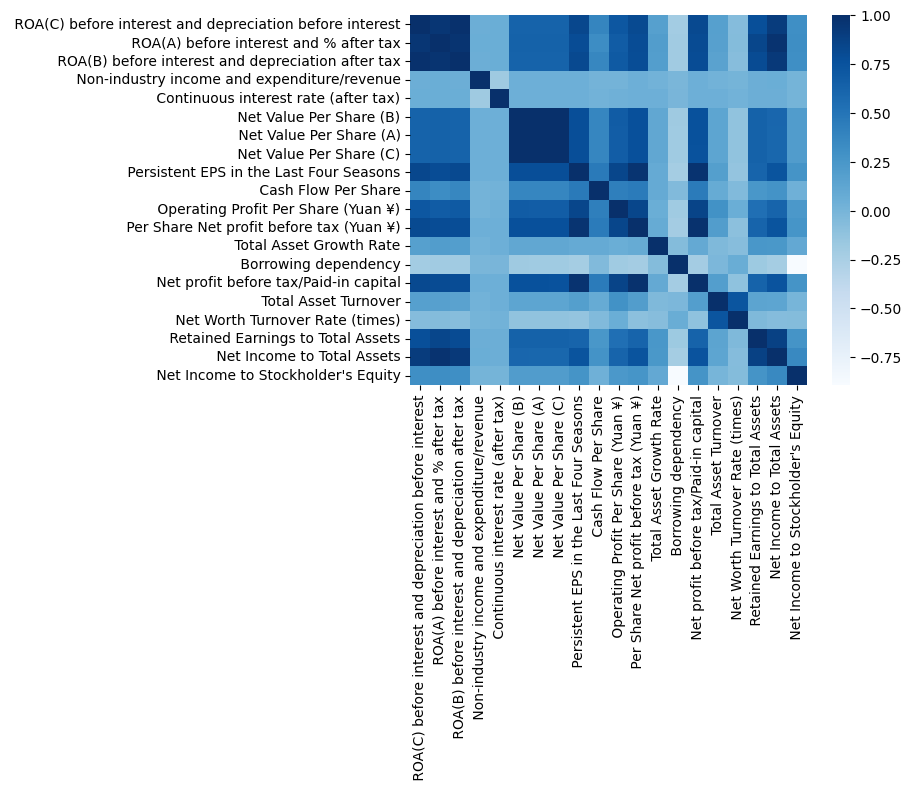

In [20]:
plt.figure()
sns.heatmap(X_selected.corr(), cmap = "Blues")
plt.show()

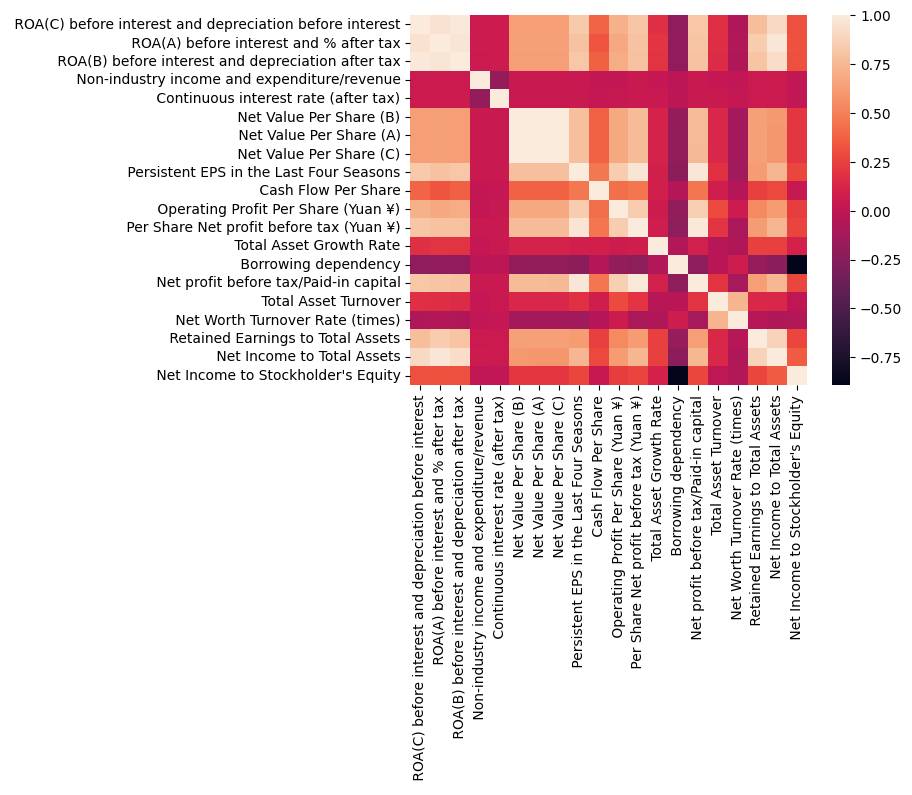

In [21]:
g=sns.heatmap(X_selected.corr())

In [22]:
X_selected2=X_selected
X_selected2.insert(0,'Bankrupt?','')


X_selected2['Bankrupt?'] = y_sm

corr_mtx = abs(X_selected2.corr())
corr_mtx.style.background_gradient(cmap='coolwarm')

C:\Users\TheRealJoker\AppData\Local\Temp\ipykernel_27996\314869035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected2['Bankrupt?'] = y_sm


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Total Asset Growth Rate,Borrowing dependency,Net profit before tax/Paid-in capital,Total Asset Turnover,Net Worth Turnover Rate (times),Retained Earnings to Total Assets,Net Income to Total Assets,Net Income to Stockholder's Equity
Bankrupt?,1.000000,0.573593,0.552729,0.566727,0.048633,0.026530,0.500316,0.499808,0.497547,0.569839,0.261643,0.438451,0.545450,0.124548,0.203914,0.552522,0.224067,0.039190,0.487686,0.537986,0.171869
ROA(C) before interest and depreciation before interest,0.573593,1.000000,0.951192,0.988845,0.050555,0.060131,0.630284,0.628645,0.627851,0.832335,0.386401,0.715816,0.813170,0.179439,0.210591,0.817381,0.174624,0.066762,0.773374,0.904677,0.309471
ROA(A) before interest and % after tax,0.552729,0.951192,1.000000,0.968447,0.056604,0.056979,0.636248,0.634779,0.634525,0.798440,0.327297,0.679256,0.797548,0.201643,0.198322,0.803984,0.166342,0.059803,0.839542,0.972851,0.313487
ROA(B) before interest and depreciation after tax,0.566727,0.988845,0.968447,1.000000,0.050514,0.059238,0.626395,0.624827,0.624178,0.818797,0.365456,0.690283,0.788375,0.187892,0.201987,0.793351,0.155455,0.073766,0.804817,0.931578,0.309858
Non-industry income and expenditure/revenue,0.048633,0.050555,0.056604,0.050514,1.000000,0.188093,0.045970,0.046062,0.045905,0.043318,0.012218,0.017611,0.046561,0.018040,0.012659,0.047198,0.018515,0.006720,0.051520,0.055491,0.009700
Continuous interest rate (after tax),0.026530,0.060131,0.056979,0.059238,0.188093,1.000000,0.044448,0.044564,0.044497,0.040779,0.021856,0.036568,0.040582,0.043278,0.005794,0.040308,0.045180,0.025071,0.049800,0.049757,0.008874
Net Value Per Share (B),0.500316,0.630284,0.636248,0.626395,0.045970,0.044448,1.000000,0.999251,0.998827,0.783332,0.375904,0.676050,0.770267,0.108273,0.187037,0.758126,0.132410,0.118318,0.631730,0.601780,0.203807
Net Value Per Share (A),0.499808,0.628645,0.634779,0.624827,0.046062,0.044564,0.999251,1.000000,0.999581,0.782745,0.375223,0.674884,0.769476,0.107527,0.190000,0.756656,0.133771,0.117071,0.631295,0.600319,0.203378
Net Value Per Share (C),0.497547,0.627851,0.634525,0.624178,0.045905,0.044497,0.998827,0.999581,1.000000,0.781524,0.374250,0.674317,0.768350,0.109027,0.189941,0.755633,0.132119,0.117926,0.630857,0.600252,0.203566
Persistent EPS in the Last Four Seasons,0.569839,0.832335,0.798440,0.818797,0.043318,0.040779,0.783332,0.782745,0.781524,1.000000,0.464193,0.842588,0.968313,0.085170,0.220673,0.971534,0.182964,0.132090,0.623367,0.741384,0.271627


# **Models**

SVM, RandomForestClassifier, AdaBoost, LogisticRegression, KNN Classifier Algorithm, 


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'C': [1,5,10,20],
            'kernel': ['rbf','linear','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,30,50],
            'criterion':['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver':['lbfgs','liblinear']
        }
    },
   'KNN': {
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors' : [1,3,5,7],
            'algorithm':['auto','kd_tree']
        }
    },
    'AdaBoost': {
        'model':AdaBoostClassifier(),
        'params':{
            'n_estimators': [1,2,3,5,10,20,30,50],
            'learning_rate' : [1,3,5,7],
        }
    }
}

In [24]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, verbose=3, n_jobs=-1, scoring = 'recall', return_train_score=False)
    clf.fit(X_selected, y_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits


,model,best_score,best_params
0,svm,1.0,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,1.0,"{'criterion': 'gini', 'n_estimators': 10}"
2,logistic_regression,1.0,"{'C': 1, 'solver': 'lbfgs'}"
3,KNN,1.0,"{'algorithm': 'auto', 'n_neighbors': 1}"
4,AdaBoost,1.0,"{'learning_rate': 1, 'n_estimators': 1}"


In [25]:
mod = []
accuracy = []

Recall = []
Precision = []
F1_measure =[]
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.metrics import f1_score, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

**The above table provides us with the tuned parameters for each of the models. Now let's implement eatch of the models and explore their accuracy and recall**

**SVC**

Model accuracy score with rbf kernel and C=100.0 : 0.8746
Accuracy is: 87.46212121212122
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1320
           1       0.85      0.91      0.88      1320

    accuracy                           0.87      2640
   macro avg       0.88      0.87      0.87      2640
weighted avg       0.88      0.87      0.87      2640



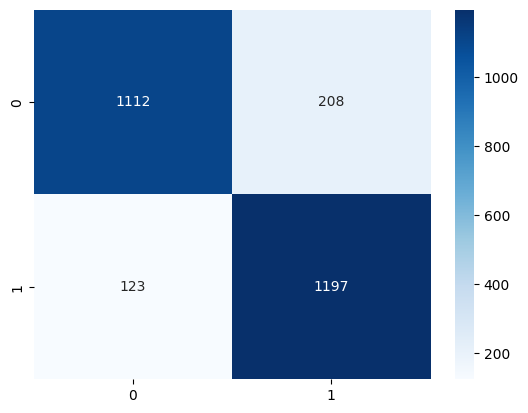

In [26]:
svc=SVC(gamma='auto',C=100.0,probability=True, kernel='rbf' ) 

# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
acc_score= accuracy_score(y_test, y_pred)
print("Accuracy is:" ,acc_score*100)
print(classification_report(y_test, y_pred))
svm = sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap='Blues',fmt = 'd')

mod.append('SVC')
accuracy.append(acc_score)
F1_measure.append(f1_score(y_test, y_pred))
Recall.append(recall_score(y_test, y_pred))
Precision.append(precision_score(y_test, y_pred))

**RandomForestClassifier**

Accuracy is: 95.41666666666667
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1320
           1       0.93      0.98      0.96      1320

    accuracy                           0.95      2640
   macro avg       0.96      0.95      0.95      2640
weighted avg       0.96      0.95      0.95      2640



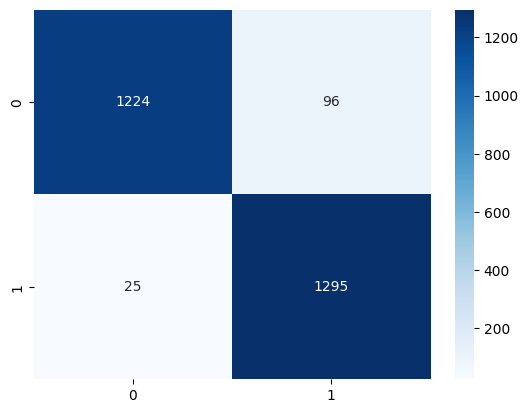

In [27]:

# create the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state = 777)
# fit the model to the training set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc_score= accuracy_score(y_test, y_pred)
print("Accuracy is:" ,acc_score*100)
print(classification_report(y_test, y_pred))
svm = sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap='Blues',fmt = 'd')


mod.append('RandomForestClassifier')
accuracy.append(acc_score)
F1_measure.append(f1_score(y_test, y_pred))
Recall.append(recall_score(y_test, y_pred))
Precision.append(precision_score(y_test, y_pred))

**KNN Classifier Algorithm**

Accuracy is: 90.45454545454545
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1229
           1       0.92      0.90      0.91      1411

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



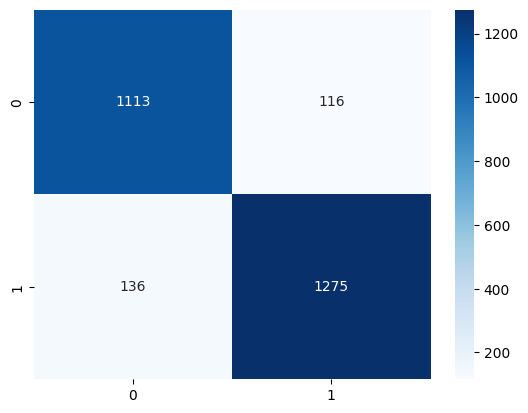

In [28]:


knn = KNeighborsClassifier(n_neighbors=4, algorithm='auto')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)


acc_score= accuracy_score(knn_pred, y_pred)
print("Accuracy is:" ,acc_score*100)
print(classification_report(knn_pred, y_pred))
svm = sns.heatmap(confusion_matrix(knn_pred,y_pred), annot = True, cmap='Blues',fmt = 'd')


mod.append('KNeighborsClassifier')
accuracy.append(acc_score)
F1_measure.append(f1_score(knn_pred, y_pred))
Recall.append(recall_score(knn_pred, y_pred))
Precision.append(precision_score(knn_pred, y_pred))




**LogisticRegression**

Accuracy is: 86.66666666666667
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1299
           1       0.86      0.89      0.87      1341

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640



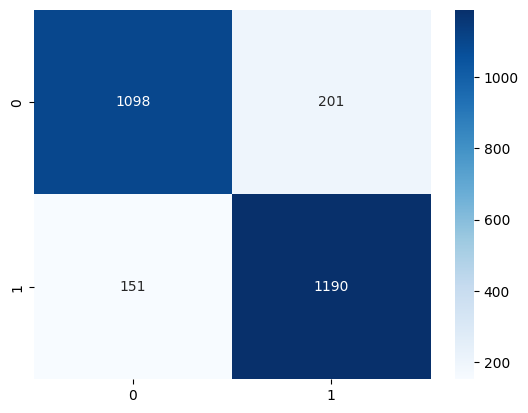

In [29]:
logmodel = LogisticRegression(solver='liblinear',multi_class='auto', C = 5)
logmodel.fit(X_train,y_train)
log_predictions = logmodel.predict(X_test)

acc_score= accuracy_score(log_predictions, y_pred)
print("Accuracy is:" ,acc_score*100)
print(classification_report(log_predictions, y_pred))
svm = sns.heatmap(confusion_matrix(log_predictions,y_pred), annot = True, cmap='Blues',fmt = 'd')


mod.append('LogisticRegression')
accuracy.append(acc_score)
F1_measure.append(f1_score(log_predictions, y_pred))
Recall.append(recall_score(log_predictions, y_pred))
Precision.append(precision_score(log_predictions, y_pred))

**AdaBoostClassifier**

Accuracy is: 92.00757575757575
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1240
           1       0.93      0.92      0.92      1400

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640



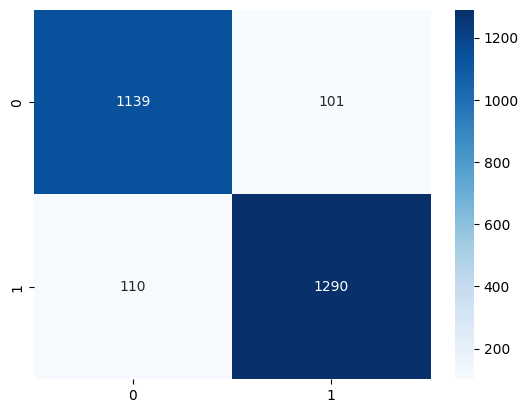

In [30]:
abc = AdaBoostClassifier(n_estimators = 50,
                         learning_rate = 1,
                         random_state = 0)
abc.fit(X_train, y_train)
y_pred_abc = abc.predict(X_test)

acc_score= accuracy_score(y_pred_abc, y_pred)
print("Accuracy is:" ,acc_score*100)
print(classification_report(y_pred_abc, y_pred))
svm = sns.heatmap(confusion_matrix(y_pred_abc,y_pred), annot = True, cmap='Blues',fmt = 'd')


mod.append('AdaBoostClassifier')
accuracy.append(acc_score)
F1_measure.append(f1_score(y_pred_abc, y_pred))
Recall.append(recall_score(y_pred_abc, y_pred))
Precision.append(precision_score(y_pred_abc, y_pred))

**ROC Curves**

ROC Logistic

In [31]:
y_pred_logistic = logmodel.predict_proba(X_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

ROC RandomForrest

In [32]:
y_pred_rfc = clf.predict_proba(X_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

ROC, SVC

In [33]:
y_pred_svm = svc.predict_proba(X_test)[:,1]
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

ROC, KNN

In [34]:
y_pred_knn = knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

ROC, AdaBoost

In [35]:
y_pred_abc = abc.predict_proba(X_test)[:,1]
abc_fpr, abc_tpr, threshold = roc_curve(y_test, y_pred_abc)
auc_abc = auc(abc_fpr, abc_tpr)

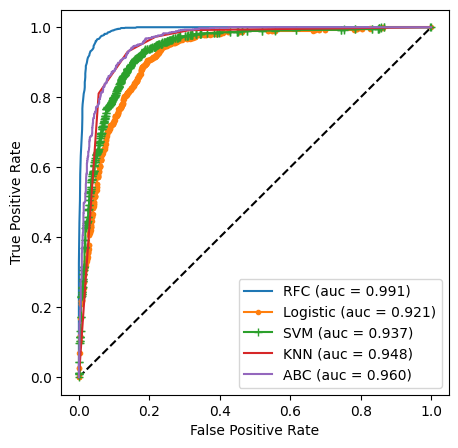

In [36]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='RFC (auc = %0.3f)' % auc_rfc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(svm_fpr, svm_tpr, marker='+', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(abc_fpr, abc_tpr, linestyle='-', label='ABC (auc = %0.3f)' % auc_abc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')

# **Comparing Models**

In [37]:
df2 = pd.DataFrame({'Classifier': mod, 'Accuracy': accuracy, 'F1-Measure': F1_measure,'Recall': Recall,'Precision':Precision})
df2

,Classifier,Accuracy,F1-Measure,Recall,Precision
0,SVC,0.874621,0.878532,0.906818,0.851957
1,RandomForestClassifier,0.954167,0.955367,0.981061,0.930985
2,KNeighborsClassifier,0.904545,0.910064,0.903614,0.916607
3,LogisticRegression,0.866667,0.871157,0.887397,0.855500
4,AdaBoostClassifier,0.920076,0.924400,0.921429,0.927390


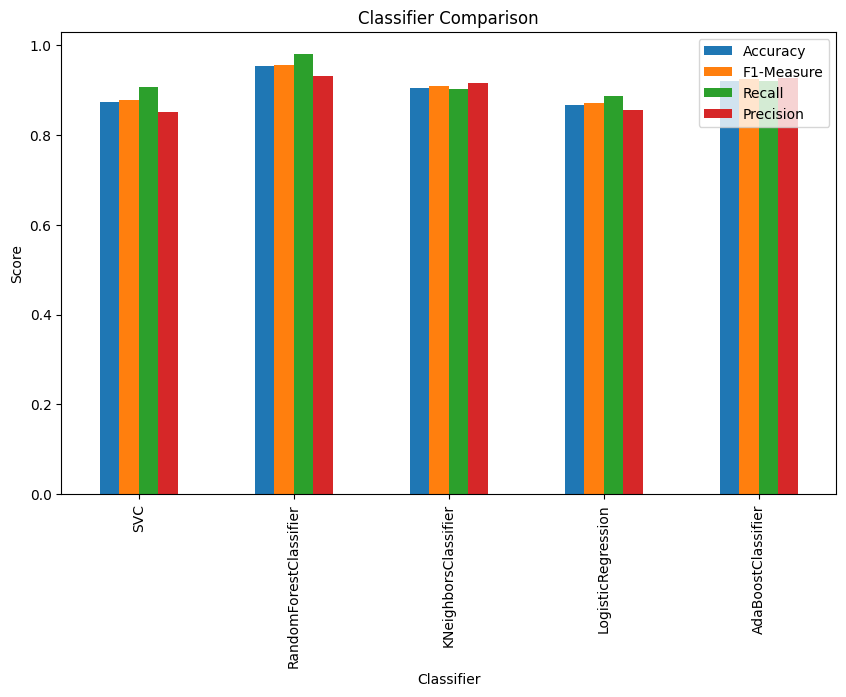

In [38]:
import pandas as pd
import matplotlib.pyplot as plt



df2.set_index('Classifier', inplace=True)

ax = df2.plot(kind='bar', figsize=(10,6))

ax.set_title('Classifier Comparison')
ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
plt.show()